# 9th of July, 2018
## Benjamin Adam Catching
## Andino Lab Rotation
## Poliovirus DIP Project

Today the two goals are to:  
* Begin the processing pipeline of mouse video  
    - Convert data from .h264 to .h5 (ask Tom if data can be directly converted)  
    - Extract characteristics from mice (look to the Kokel lab for what has been done)  
* Finalize analysis of CirSeq data  
    - Extract any useful mutants (filter the non-mutants from Friday's data)  
    - If any useful mutants exist, analysis

### Mouse Data Processing and Analysis

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob
import skvideo.io
import h5py

In [2]:
# Read in the converted .h264 -> .m4v, convert to array of frames
frames = []
cap = skvideo.io.vreader('../../data/Test3_2black_rr.m4v')

it = 0
while True:
    try:
        image = next(cap)
        frames.append(image)
        it += 1
        if (it % 100 == 0):
            print('Processed %d frames so far' % (it))
    except:
        break

Processed 100 frames so far
Processed 200 frames so far
Processed 300 frames so far
Processed 400 frames so far
Processed 500 frames so far
Processed 600 frames so far


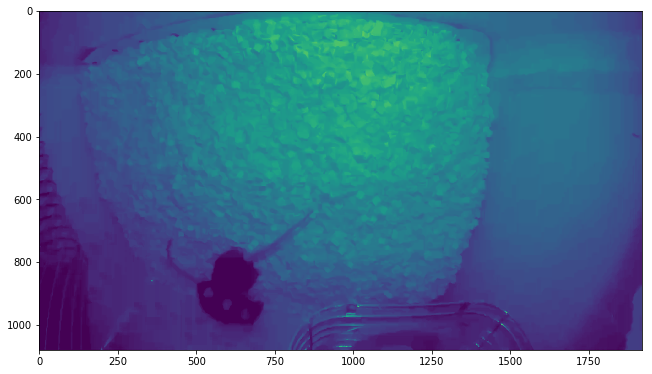

In [29]:
# Display the first frame
fig, ax = plt.subplots(1, 1, figsize=(10.80, 19.20))
plt.imshow(frames[0][:,:,2])
plt.show()

In [4]:
# Attempt to write the file to h5 format
with h5py.File('../../data/test3.hdf5','w') as h5File:
    h5File.create_dataset('camera1',data=frames,compression='gzip',compression_opts=9)

In [33]:
gray = np.float32(frames[0])
dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)
plt.imshow(dst)

error: /Users/travis/miniconda3/conda-bld/opencv_1489542914304/work/opencv-3.1.0/modules/imgproc/src/corner.cpp:287: error: (-215) src.type() == CV_8UC1 || src.type() == CV_32FC1 in function cornerEigenValsVecs


In [7]:
# Read in the distortion image
# Read in the converted .h264 -> .m4v, convert to array of frames
test_frames = []
cap = skvideo.io.vreader('../../data/Distortion_test_4mice.m4v')

it = 0
while True:
    try:
        image = next(cap)
        test_frames.append(image)
        it += 1
        if (it % 100 == 0):
            print('Processed %d frames so far' % (it))
    except:
        break

Processed 100 frames so far


/Users/adam/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


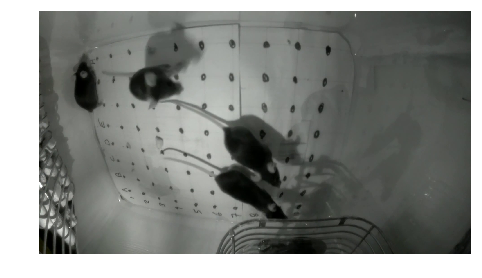

In [138]:
# Display the first frame
test_frame = test_frames[90]#[:, 0:500]
#fig, ax = plt.subplots(1, 1, figsize=(19.20, 10.80))
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
ax.imshow(test_frame)
#myFig = plt.figure()
plt.tight_layout()
plt.savefig('../../data/mouse_image_1.png', dpi=320)
plt.show()

In [270]:
# The location of the points are needed to generate the 
np_dot_list = [(610, 856), (586, 792), (564, 712), (548, 634), (530, 536), (506, 430), (494, 304),
           (696, 868), (680, 840), (664, 724), (652, 648), (632, 538), (616, 432), (610, 300),
           (780, 880), (770, 812), (766, 734), (754, 650), (746, 546), (734, 438), (728, 302),
           (872, 884), (868, 820), (868, 738), (860, 664), (862, 550), (854, 430), (860, 290),
           (972, 878), (978, 824), (980, 744), (984, 654), (992, 554), (1002, 432), (1008, 298),
           (1066, 880), (1078, 926), (1092, 748), (1106, 664), (1114, 558), (1130, 440), (1142, 302)]

In [280]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

c = np.mgrid[0:7, 0:6].T.reshape(-1, 2)


# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
objpoints.append(objp)
#imgpoints.append(np.array(np_dot_list))

In [276]:
#dot_tuple = [np.array([tuple(x) for x in np_dot_list])]
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, test_frame,None,None)

SystemError: new style getargs format but argument is not a tuple

In [282]:
for x in np_dot_list:
    print(x)
    imgpoints = np.append(imgpoints, tuple(x))

(610, 856)
(586, 792)
(564, 712)
(548, 634)
(530, 536)
(506, 430)
(494, 304)
(696, 868)
(680, 840)
(664, 724)
(652, 648)
(632, 538)
(616, 432)
(610, 300)
(780, 880)
(770, 812)
(766, 734)
(754, 650)
(746, 546)
(734, 438)
(728, 302)
(872, 884)
(868, 820)
(868, 738)
(860, 664)
(862, 550)
(854, 430)
(860, 290)
(972, 878)
(978, 824)
(980, 744)
(984, 654)
(992, 554)
(1002, 432)
(1008, 298)
(1066, 880)
(1078, 926)
(1092, 748)
(1106, 664)
(1114, 558)
(1130, 440)
(1142, 302)
